In [1]:
from gcpds.utils import loaddb
from matplotlib import pyplot as plt
import numpy as np

# EEG Filters

In [2]:
from gcpds.utils import filters as flt

INFO:root:All filter were precompiled using 250.00 Hz as sampling frequency by default.


In [3]:
db = loaddb.BCI2a('BCI2a_database')
db.load_subject(1)
run, _ = db.get_run(0)
trial = run[0,0][:db.fs]
trial.shape

(250,)

There are some predefined filters: `notch60`, `band545`, `band330`, `band245`, `band440`, `delta`, `theta`, `alpha`, `beta`, `band1100`, `mu`, `band150`, `band713`, `band1550` and `band550`

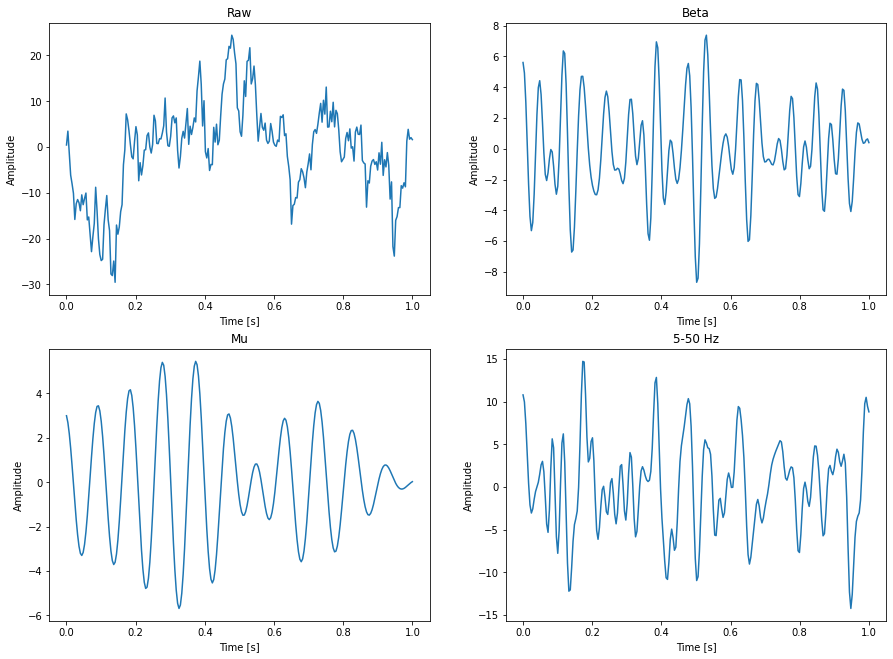

In [4]:
plt.figure(figsize=(15, 11))

t = np.linspace(0, trial.shape[0]/db.fs, trial.shape[0])

plt.subplot(221)
plt.title('Raw')
plt.plot(t, trial)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(222)
plt.title('Beta')
plt.plot(t, flt.beta(trial, fs=250))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(223)
plt.title('Mu')
plt.plot(t, flt.mu(trial, fs=250))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(224)
plt.title('5-50 Hz')
plt.plot(t, flt.band550(trial, fs=250))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.show()

A custom filter can be declared with the methods `GenericButterBand` and `GenericNotch` 

In [5]:
notch66 =  flt.GenericNotch(f0=66, fs=250)
band830 =  flt.GenericButterBand(f0=8, f1=30, fs=250)

INFO:root:Compiled `Notch` filter (66 Hz) for 250.00 Hz
INFO:root:Compiled `Butter` filter (8|30 Hz) for 250.00 Hz


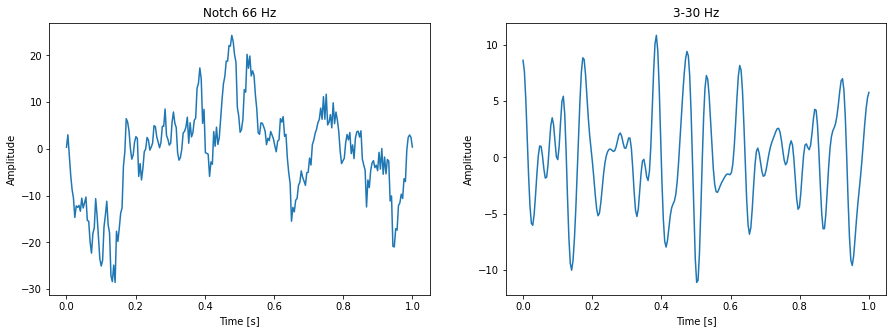

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Notch 66 Hz')
plt.plot(t, notch66(trial, fs=250))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(122)
plt.title('3-30 Hz')
plt.plot(t, band830(trial, fs=250))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.show()

The same filter is automatically recompilled for a different sampling rate.

INFO:root:Compiled `Notch` filter (66 Hz) for 512.01 Hz
INFO:root:Compiled `Butter` filter (8|30 Hz) for 512.01 Hz


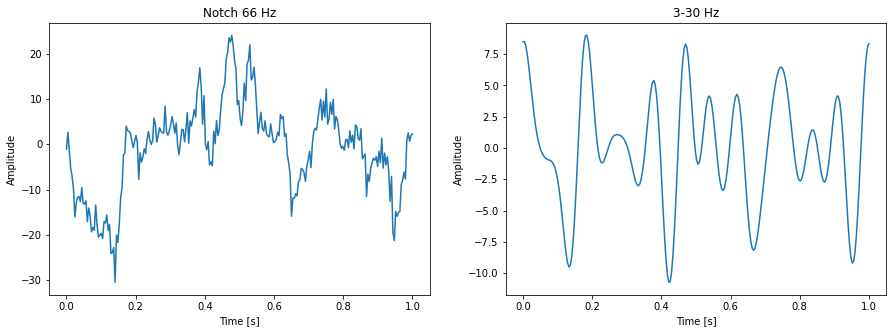

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Notch 66 Hz')
plt.plot(t, notch66(trial, fs=512))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(122)
plt.title('3-30 Hz')
plt.plot(t, band830(trial, fs=512))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.show()

----
### References

  * [Butterworth digital and analog filter design](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter)
  * [Design second-order IIR notch digital filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html#scipy.signal.iirnotch)
  * [Apply a digital filter forward and backward to a signal.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html#scipy.signal.filtfilt)
